In [18]:
from layer import Dense, Dropout, Conv2d, Flatten, MaxPool2d
from activation import LeakyReLU
from solver import SGD
from loss import CrossEntropyLoss
from data import Dataset
from network import Network
from utils import *

import numpy as np
import matplotlib.pyplot as plt
import joblib

from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

# Fashion MNIST

In [19]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# data preproccess, normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# reshape so that it has 1 channel (greyscale)
X_train = X_train.reshape(60000, 1, 28, 28)
X_test = X_test.reshape(10000, 1, 28, 28)

In [20]:
# create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [21]:
fashion_mnist_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

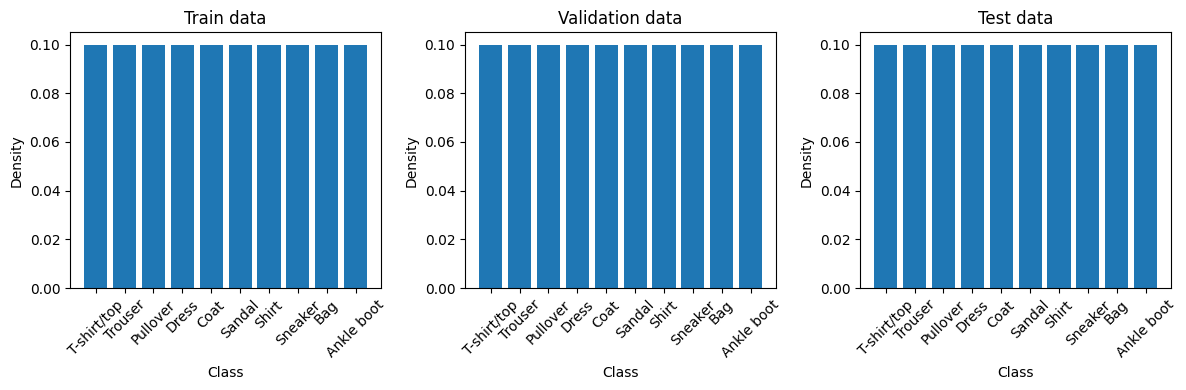

In [22]:
plot_class_balance([y_train, y_val, y_test], fashion_mnist_labels, tilt=45)

In [23]:
no_classes = 10
y_train = np.eye(no_classes)[y_train]
y_val = np.eye(no_classes)[y_val]
y_test = np.eye(no_classes)[y_test]

train_data = Dataset(X_train, y_train)
val_data = Dataset(X_val, y_val)
test_data = Dataset(X_test, y_test)

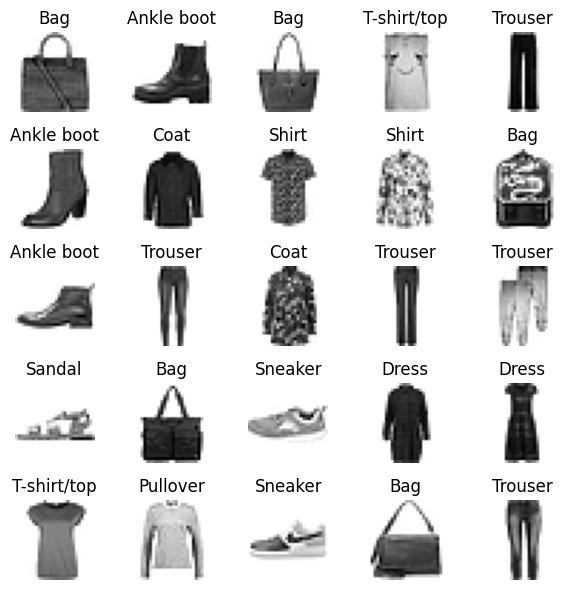

In [24]:
show_grid(X_train[:25], y_train[:25], class_names=fashion_mnist_labels, cmap='binary')

In [25]:
solver = SGD(lr=0.1)
loss = CrossEntropyLoss()

early_stopping={
    'patience': 25,
    'min_delta': 0,
    'restore_best_parameters': True
}

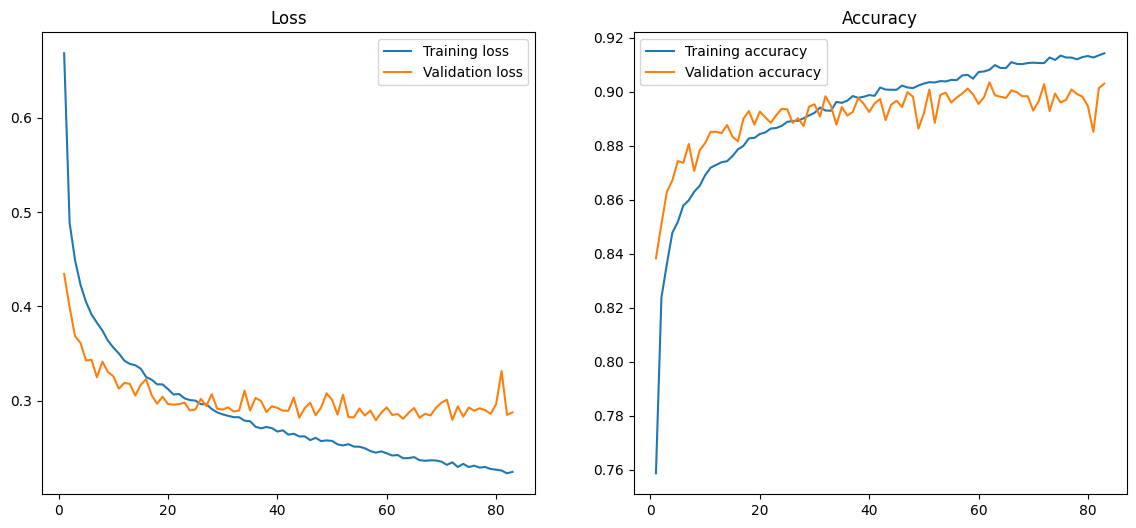

{'epoch_stopped': 83, 'epoch_params': 58}

Acc: 0.8897

              precision    recall  f1-score   support

 T-shirt/top     0.8573    0.8230    0.8398      1000
     Trouser     0.9898    0.9680    0.9788      1000
    Pullover     0.7929    0.8270    0.8096      1000
       Dress     0.8426    0.9420    0.8895      1000
        Coat     0.8283    0.7960    0.8118      1000
      Sandal     0.9680    0.9690    0.9685      1000
       Shirt     0.7328    0.6800    0.7054      1000
     Sneaker     0.9371    0.9690    0.9528      1000
         Bag     0.9721    0.9750    0.9735      1000
  Ankle boot     0.9733    0.9480    0.9605      1000

    accuracy                         0.8897     10000
   macro avg     0.8894    0.8897    0.8890     10000
weighted avg     0.8894    0.8897    0.8890     10000



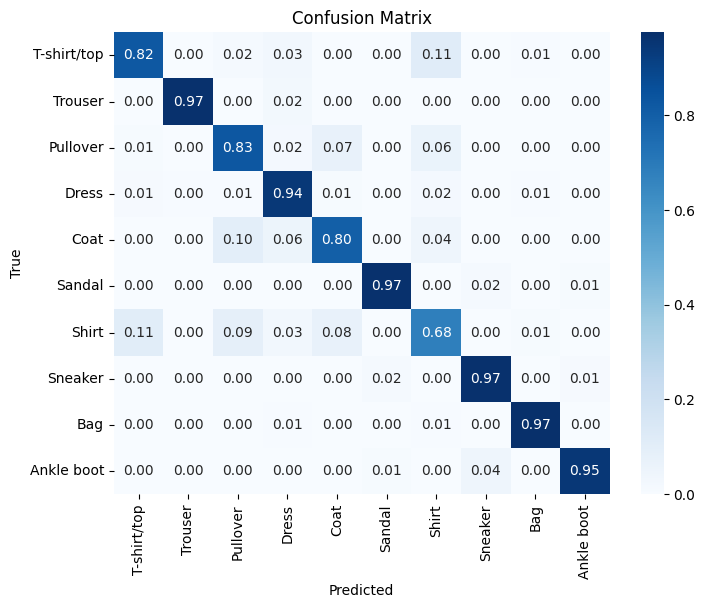

In [26]:
f_mnist_nn_1 = Network([
    Flatten(),
    
    Dense(128),
    LeakyReLU(0.1),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(0.1),
    Dropout(0.3),

    Dense(10),
])

f_mnist_nn_1.compile(loss, solver)

try:
    f_mnist_nn_1 = joblib.load('models//f_mnist_nn_1.joblib')
except:
    history = f_mnist_nn_1.train(dataset=train_data, epochs=200, val_dataset=val_data, early_stopping=early_stopping)
    # save the model
    joblib.dump(f_mnist_nn_1, 'models//f_mnist_nn_1.joblib')

plot_hist(f_mnist_nn_1.history)

try:
    print(f_mnist_nn_1.early_stopped)
except:
    pass

y_pred = f_mnist_nn_1.predict(X_test)
print("\nAcc:", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print()

evaluate_classification(y_test, y_pred, labels=fashion_mnist_labels)

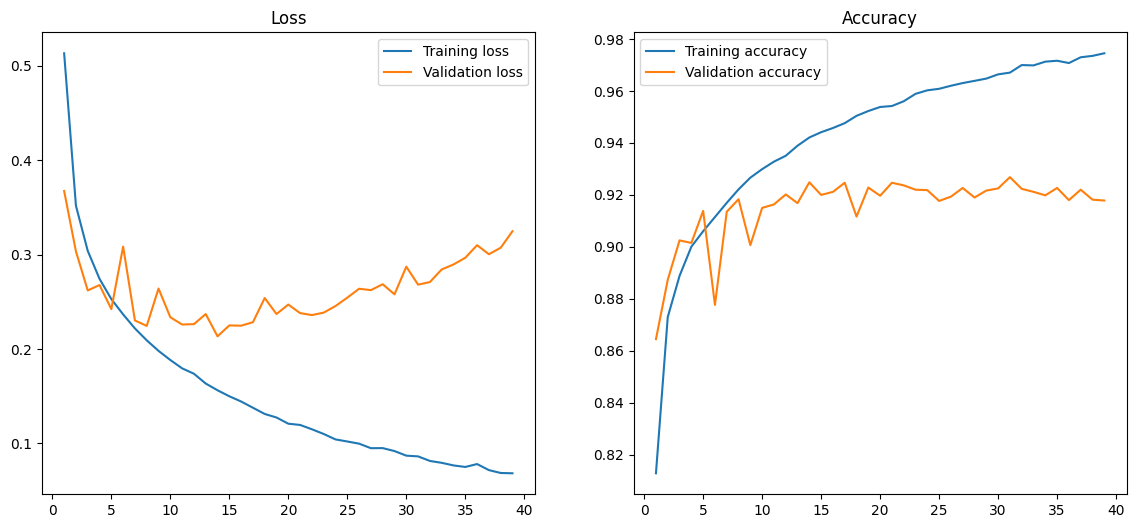

{'epoch_stopped': 39, 'epoch_params': 14}

Acc: 0.9153

              precision    recall  f1-score   support

 T-shirt/top     0.8979    0.8440    0.8701      1000
     Trouser     0.9949    0.9790    0.9869      1000
    Pullover     0.8631    0.8640    0.8636      1000
       Dress     0.9347    0.9020    0.9181      1000
        Coat     0.8408    0.8820    0.8609      1000
      Sandal     0.9858    0.9750    0.9804      1000
       Shirt     0.7467    0.7930    0.7692      1000
     Sneaker     0.9345    0.9840    0.9586      1000
         Bag     0.9849    0.9790    0.9819      1000
  Ankle boot     0.9875    0.9510    0.9689      1000

    accuracy                         0.9153     10000
   macro avg     0.9171    0.9153    0.9159     10000
weighted avg     0.9171    0.9153    0.9159     10000



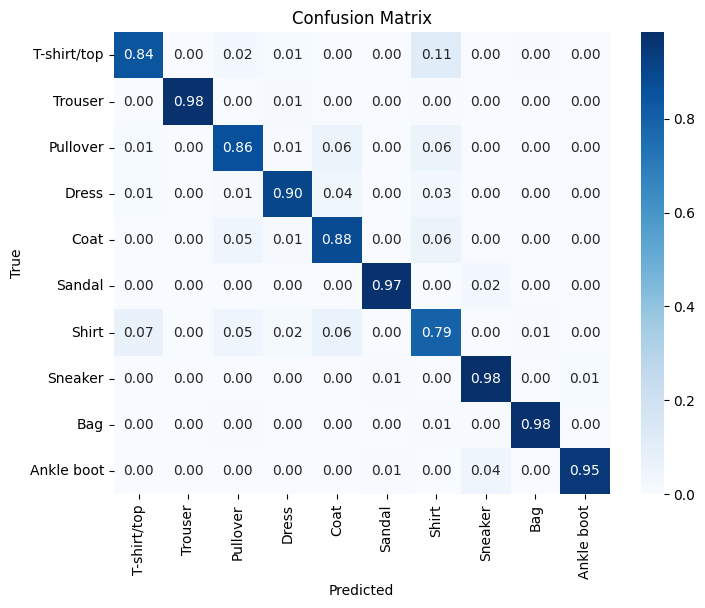

In [27]:
f_mnist_cnn_1 = Network([
    Conv2d(1, 16, 3, padding=1),  # 16 x 28 x 28
    LeakyReLU(0.1), 
    MaxPool2d(),                  # 16 x 14 x 14

    Conv2d(16, 32, 3, padding=1), # 32 x 14 x 14
    LeakyReLU(0.1), 
    MaxPool2d(),                  # 32 x 7 x 7

    Flatten(),                    # 32*7*7 -> 1568
    
    Dense(128),
    LeakyReLU(0.1),
    Dropout(0.3),

    Dense(10),
])


f_mnist_cnn_1.compile(loss, solver)

try:
    f_mnist_cnn_1 = joblib.load('models//f_mnist_cnn_1.joblib')
except:
    history = f_mnist_cnn_1.train(dataset=train_data, epochs=200, val_dataset=val_data, early_stopping=early_stopping)
    # save the model
    joblib.dump(f_mnist_cnn_1, 'models//f_mnist_cnn_1.joblib')

plot_hist(f_mnist_cnn_1.history)

try:
    print(f_mnist_cnn_1.early_stopped)
except:
    pass

y_pred = f_mnist_cnn_1.predict(X_test)
print("\nAcc:", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print()

evaluate_classification(y_test, y_pred, labels=fashion_mnist_labels)

### Data augmentation

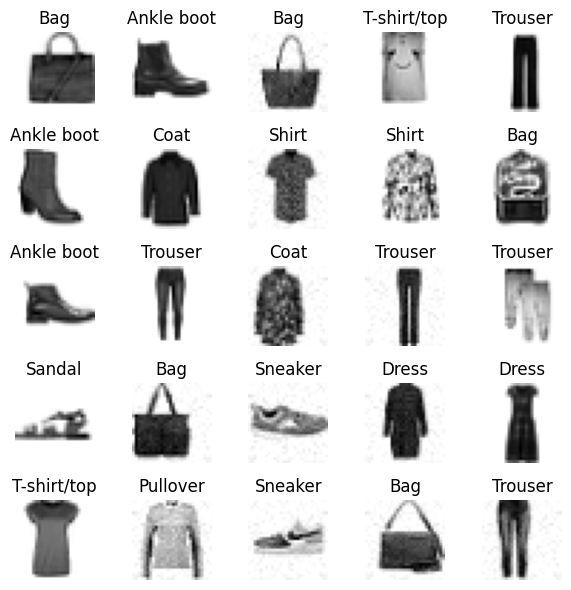

In [28]:
show_grid(transform_f_mnist_dataset(X_train[:25]), y_train[:25], class_names=fashion_mnist_labels, cmap='binary')

In [29]:
train_data_trans = Dataset(X_train, y_train, transform=transform_f_mnist_dataset)

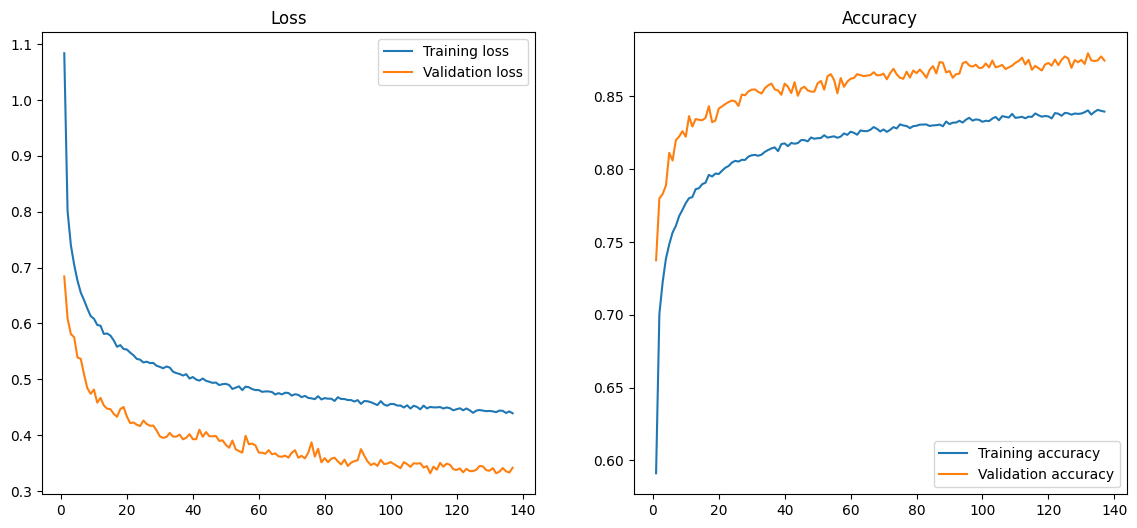

{'epoch_stopped': 137, 'epoch_params': 112}

Acc: 0.8596

              precision    recall  f1-score   support

 T-shirt/top     0.8250    0.7920    0.8082      1000
     Trouser     0.9750    0.9760    0.9755      1000
    Pullover     0.7674    0.7490    0.7581      1000
       Dress     0.8559    0.8910    0.8731      1000
        Coat     0.7476    0.7940    0.7701      1000
      Sandal     0.9610    0.9360    0.9483      1000
       Shirt     0.6527    0.6070    0.6290      1000
     Sneaker     0.8946    0.9590    0.9257      1000
         Bag     0.9489    0.9660    0.9574      1000
  Ankle boot     0.9586    0.9260    0.9420      1000

    accuracy                         0.8596     10000
   macro avg     0.8587    0.8596    0.8587     10000
weighted avg     0.8587    0.8596    0.8587     10000



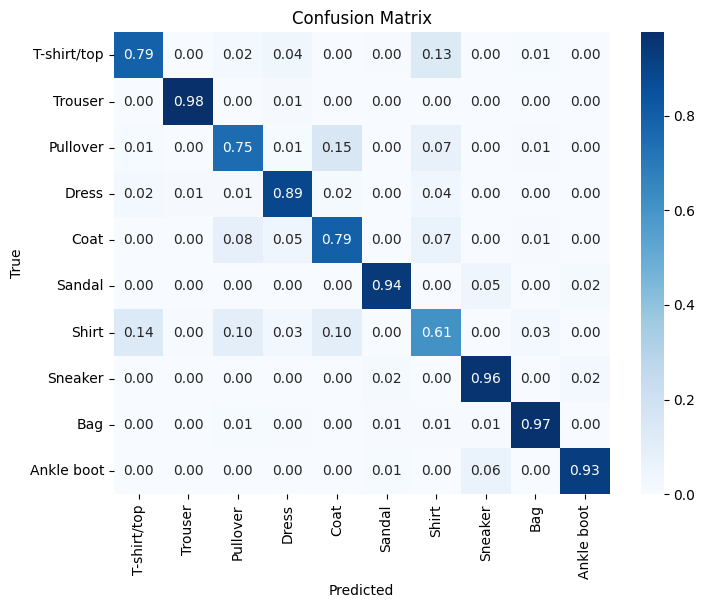

In [30]:
f_mnist_nn_2 = Network([
    Flatten(),
    
    Dense(256),
    LeakyReLU(0.1),
    Dropout(0.4),

    Dense(256),
    LeakyReLU(0.1),
    Dropout(0.4),

    Dense(128),
    LeakyReLU(0.1),
    Dropout(0.4),

    Dense(10),
])

f_mnist_nn_2.compile(loss, solver)

early_stopping['patience'] = 25

try:
    f_mnist_nn_2 = joblib.load('models//f_mnist_nn_2.joblib')
except:
    history = f_mnist_nn_2.train(dataset=train_data_trans, epochs=200, val_dataset=val_data, early_stopping=early_stopping)
    # save the model
    joblib.dump(f_mnist_nn_2, 'models//f_mnist_nn_2.joblib')

plot_hist(f_mnist_nn_2.history)

try:
    print(f_mnist_nn_2.early_stopped)
except:
    pass

y_pred = f_mnist_nn_2.predict(X_test)
print("\nAcc:", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print()

evaluate_classification(y_test, y_pred, labels=fashion_mnist_labels)

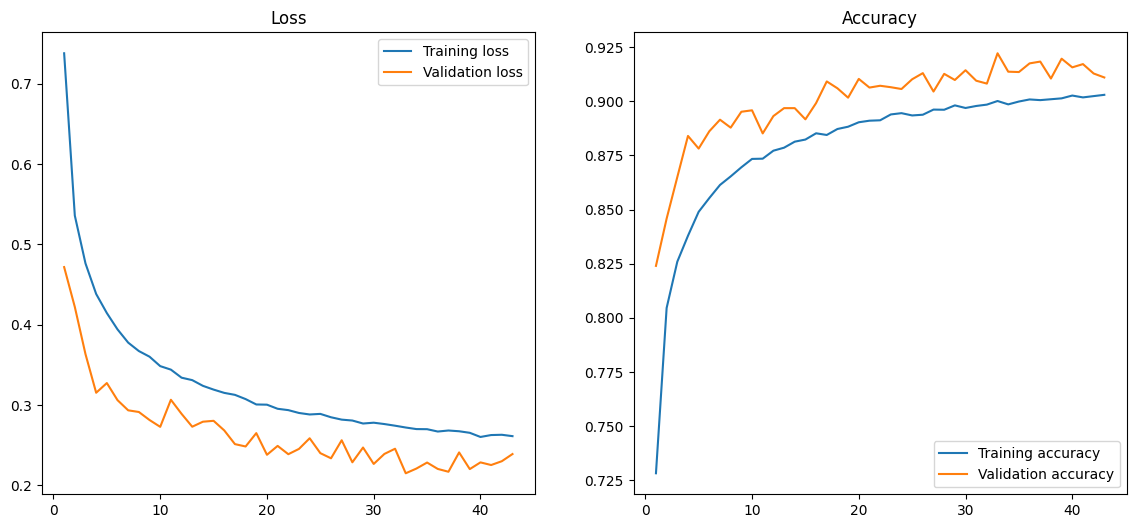

{'epoch_stopped': 43, 'epoch_params': 33}

Acc: 0.9092

              precision    recall  f1-score   support

 T-shirt/top     0.8509    0.8790    0.8647      1000
     Trouser     0.9959    0.9790    0.9874      1000
    Pullover     0.8695    0.8460    0.8576      1000
       Dress     0.9108    0.8990    0.9049      1000
        Coat     0.8244    0.8730    0.8480      1000
      Sandal     0.9791    0.9820    0.9805      1000
       Shirt     0.7558    0.7210    0.7380      1000
     Sneaker     0.9509    0.9680    0.9594      1000
         Bag     0.9812    0.9900    0.9856      1000
  Ankle boot     0.9735    0.9550    0.9642      1000

    accuracy                         0.9092     10000
   macro avg     0.9092    0.9092    0.9090     10000
weighted avg     0.9092    0.9092    0.9090     10000



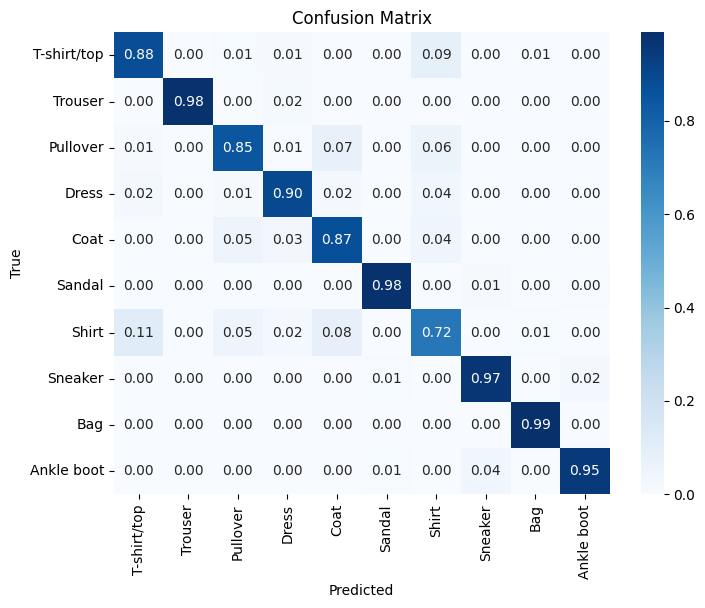

In [31]:
f_mnist_cnn_2 = Network([
    Conv2d(1, 32, 3, padding=1),
    LeakyReLU(0.1), 
    MaxPool2d(),

    Conv2d(32, 64, 3, padding=1),
    LeakyReLU(0.1), 
    MaxPool2d(),

    Flatten(),
    
    Dense(128),
    LeakyReLU(0.1),
    Dropout(0.5),

    Dense(10),
])


f_mnist_cnn_2.compile(loss, solver)

early_stopping['patience'] = 10

try:
    f_mnist_cnn_2 = joblib.load('models//f_mnist_cnn_2.joblib')
except:
    history = f_mnist_cnn_2.train(dataset=train_data_trans, epochs=200, val_dataset=val_data, early_stopping=early_stopping)
    # save the model
    joblib.dump(f_mnist_cnn_2, 'models//f_mnist_cnn_2.joblib')

plot_hist(f_mnist_cnn_2.history)

try:
    print(f_mnist_cnn_2.early_stopped)
except:
    pass

y_pred = f_mnist_cnn_2.predict(X_test)
print("\nAcc:", accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print()

evaluate_classification(y_test, y_pred, labels=fashion_mnist_labels)

In [32]:
for nn in (f_mnist_nn_1, f_mnist_nn_2, f_mnist_cnn_1, f_mnist_cnn_2):
    print(nn.param_count())

118282
300938
206922
421642
